In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snc

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train =pd.read_csv('train.csv')

In [4]:
train.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.00,0,0,350034,7.7958,NaN,S
772,773,0,2,"Mack, Mrs. (Mary)",female,57.00,0,0,S.O./P.P. 3,10.5000,E77,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [5]:
train = train.set_index('PassengerId')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
# Looking Only Null columns
train.isna().sum()[train.isna().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [8]:
train.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [9]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [11]:
train['Embarked'] =train['Embarked'].fillna(train['Embarked'].mode())

In [12]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
train['Age'] =train['Age'].fillna(train['Age'].median())
train['Embarked'].fillna(train['Embarked'].mode(), inplace=True)

In [14]:
train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [149]:
train.drop(columns='Cabin', inplace=True, axis=1)

In [150]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [151]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Age', ylabel='Sex'>

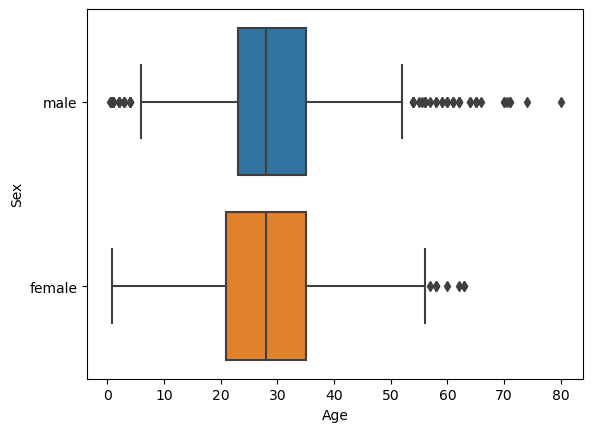

In [152]:
snc.boxplot(data=train, x="Age", y='Sex')

In [153]:
train[train['Age']>70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [154]:
p =train.Parch.value_counts()

<Axes: xlabel='Age'>

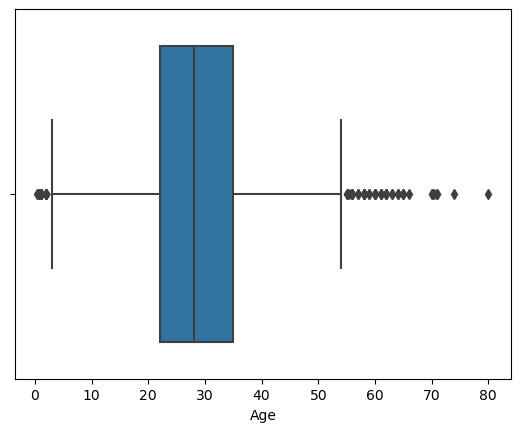

In [155]:
snc.boxplot(data=train, x="Age")

<Axes: xlabel='Survived', ylabel='count'>

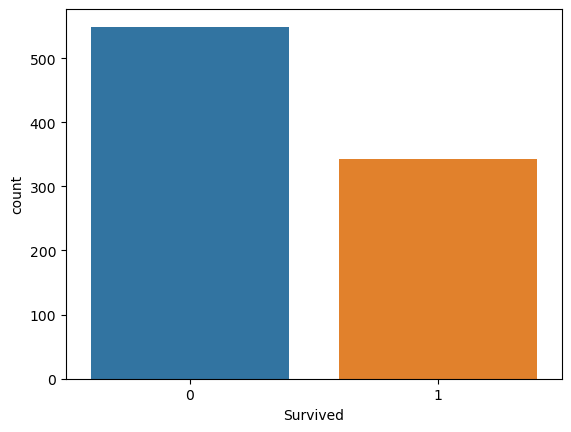

In [156]:
snc.countplot(data=train, x='Survived')

<Axes: xlabel='Survived', ylabel='count'>

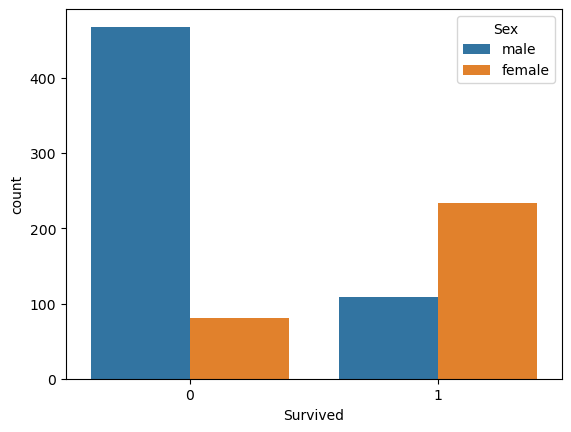

In [157]:

snc.countplot(x='Survived', hue='Sex', data=train)

<Axes: title={'center': 'Age'}, xlabel='Survived'>

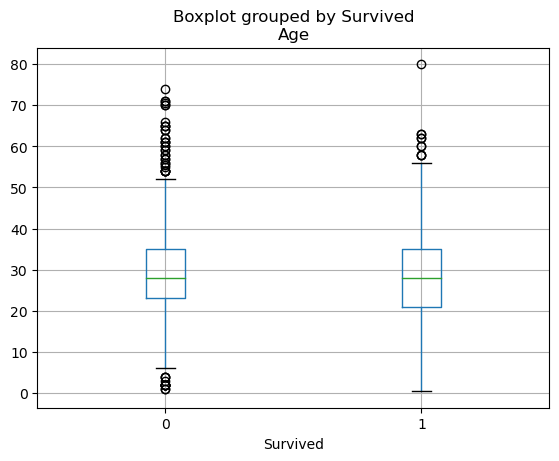

In [158]:
train.boxplot(column='Age',by='Survived')

<Axes: xlabel='Pclass', ylabel='Age'>

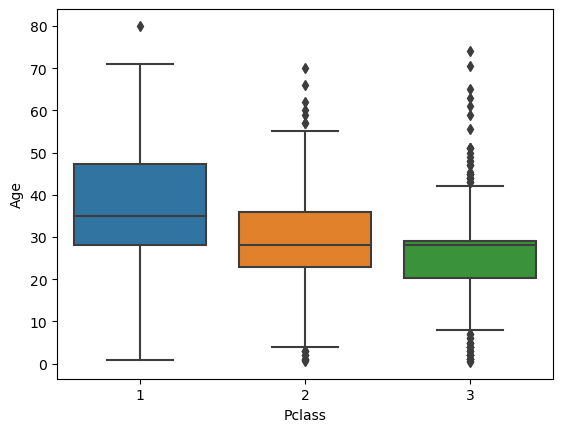

In [159]:
snc.boxplot(data=train, x='Pclass', y='Age')

In [160]:
train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [161]:
train.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [162]:
train.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='Age'>

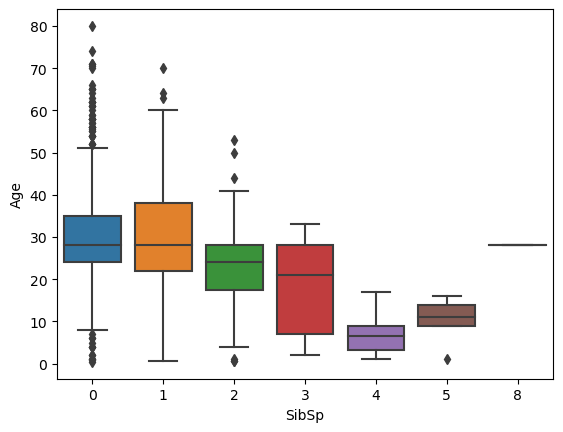

In [163]:
snc.boxplot(data=train, x='SibSp', y='Age')

In [164]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [165]:
from sklearn.impute import SimpleImputer

In [166]:
miss_Simple_imp =SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [167]:
train.iloc[:,-1:] =miss_Simple_imp.fit_transform(train.iloc[:,-1:])

In [168]:
train.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [169]:
train.Age.mode()

0    28.0
Name: Age, dtype: float64

In [170]:
train.Age.value_counts()

Age
28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 88, dtype: int64

In [171]:
test =pd.read_csv('test.csv')

In [172]:
test.sample(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
333,1225,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",female,19.0,1,1,2653,15.7417,NaN,C
243,1135,3,"Hyman, Mr. Abraham",male,NaN,0,0,3470,7.8875,NaN,S
123,1015,3,"Carver, Mr. Alfred John",male,28.0,0,0,392095,7.2500,NaN,S


In [173]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [174]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [175]:
test['Age'].fillna(test['Age'].median(), inplace=True)
#test['Cabin'].fillna(test['Cabin'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].mode(), inplace=True)

In [176]:
test.Cabin.value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [177]:
test.drop(columns='Cabin', inplace=True, axis=1)


In [178]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


<Axes: xlabel='Sex', ylabel='Age'>

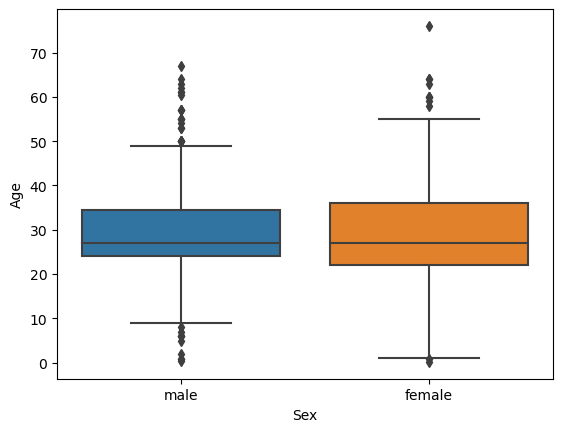

In [179]:
snc.boxplot(data=test, x='Sex', y='Age')

In [180]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


### Outliers 

<Axes: xlabel='Age', ylabel='Density'>

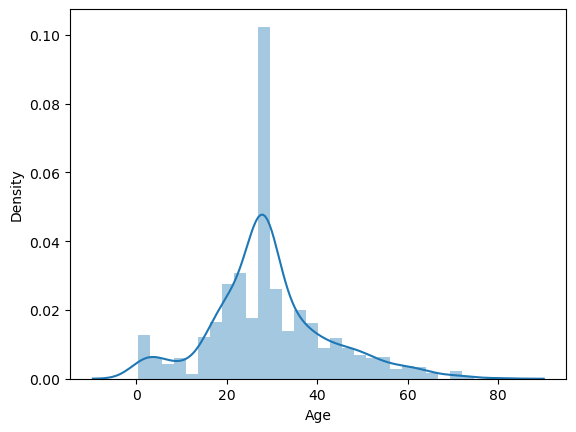

In [181]:
snc.distplot(train['Age'])

<Axes: xlabel='Age'>

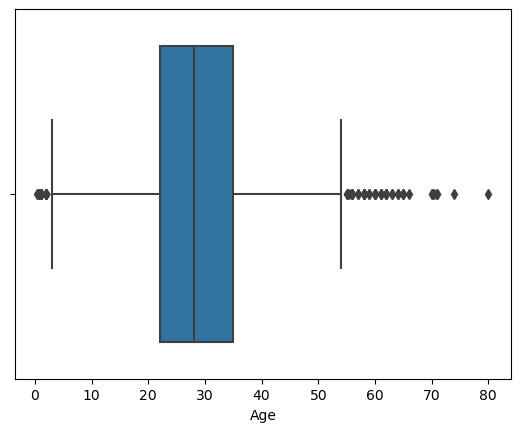

In [182]:
snc.boxplot(data=train, x='Age')

<Axes: xlabel='Fare', ylabel='Density'>

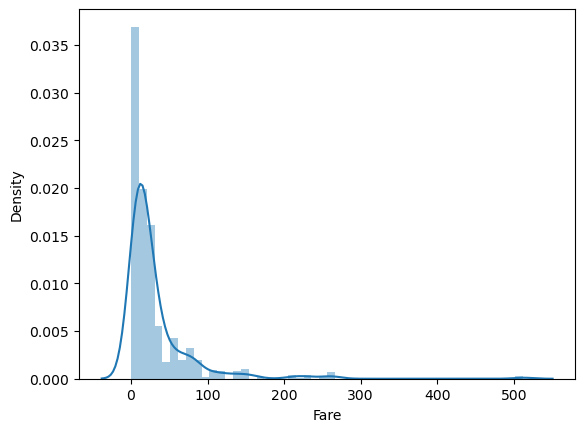

In [183]:
snc.distplot(train['Fare'])

## Z-Score

In [184]:
upper_limit = train['Age'].mean() + 3*train['Age'].std()
lower_limit = train['Age'].mean() - 3*train['Age'].std()
print('upper limit', upper_limit)
print('lower limit', lower_limit)

upper limit 68.42067214450208
lower limit -9.697507161337093


In [185]:
train.loc[(train['Age'] >upper_limit) |(train['Age'] <lower_limit)] 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,C
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,S
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,S


In [186]:
# Deliting the outliers
new_train =train.loc[(train['Age'] < upper_limit) & (train['Age'] > lower_limit)]
print('Old Data Count :-',len(train))
print('After Removin the Outliers :-', len(new_train))
print ('Total Outliers Removed :-',len(train)-len(new_train))

Old Data Count :- 891
After Removin the Outliers :- 884
Total Outliers Removed :- 7


<Axes: xlabel='Age'>

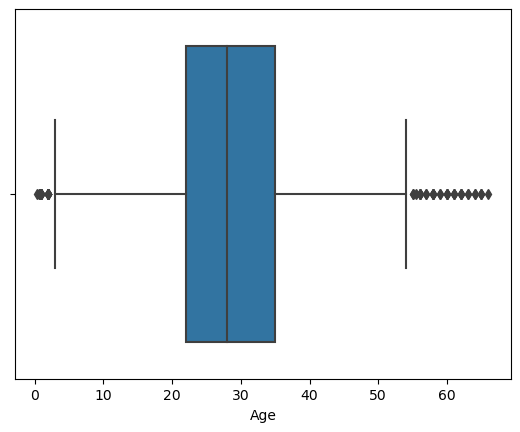

In [187]:
snc.boxplot(data=new_train, x='Age')

## Caping the outliers  with upper and lower limit

In [188]:
train1 =train.copy()

In [189]:
train1.loc[(train1['Age']> upper_limit), 'Age'] =upper_limit

<Axes: xlabel='Age'>

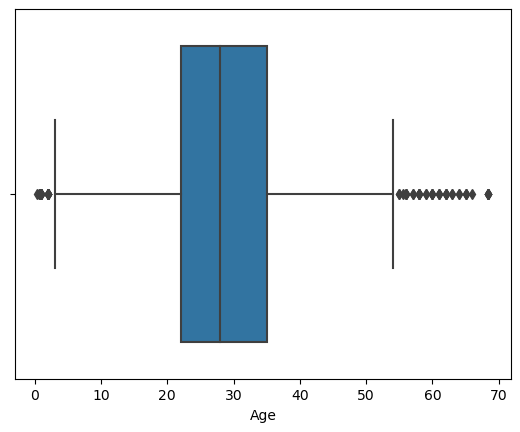

In [190]:
snc.boxplot(data=train1, x='Age')

In [191]:
len(train1)

891

<Axes: xlabel='Age', ylabel='Density'>

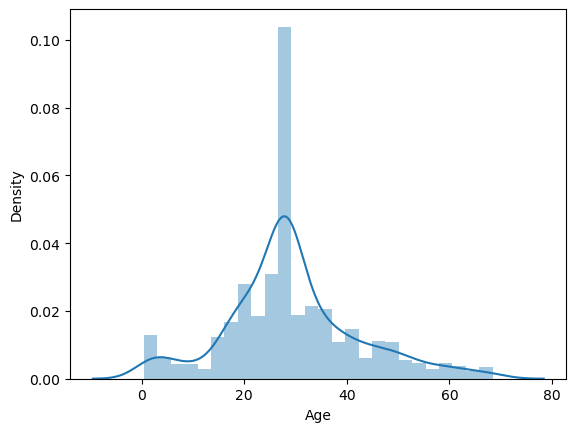

In [192]:
snc.distplot(train1['Age'])

## IQR

In [193]:
Q1 =train['Age'].quantile(0.25)
Q3 =train['Age'].quantile(0.75)
IQR = Q3-Q1
print(IQR)
print(Q1)
print(Q3)

13.0
22.0
35.0


In [194]:
print(Q1-1.5*IQR)
print(Q3+1.5*IQR)

2.5
54.5


In [195]:
train2 = train.drop(['Name','Sex','Ticket'], axis=1)

train[~((train2< (Q1-1.5*IQR)) |(train2>(Q3+1.5*IQR))).any(axis=1)]

In [196]:
upper_limit = train['Fare'].mean() + 3*train['Fare'].std()
lower_limit = train['Fare'].mean() - 3*train['Fare'].std()
print('upper limit', upper_limit)
print('lower limit', lower_limit)

upper limit 181.28449376011736
lower limit -116.87607782296807


In [197]:
len(train.loc[(train['Fare']> upper_limit)| (train['Fare']<lower_limit)])

20

In [198]:
# Deliting the outliers
new_train =train.loc[(train['Fare'] < upper_limit) & (train['Fare'] > lower_limit)]
print('Old Data Count :-',len(train))
print('After Removin the Outliers :-', len(new_train))
print ('Total Outliers Removed :-',len(train)-len(new_train))

Old Data Count :- 891
After Removin the Outliers :- 871
Total Outliers Removed :- 20


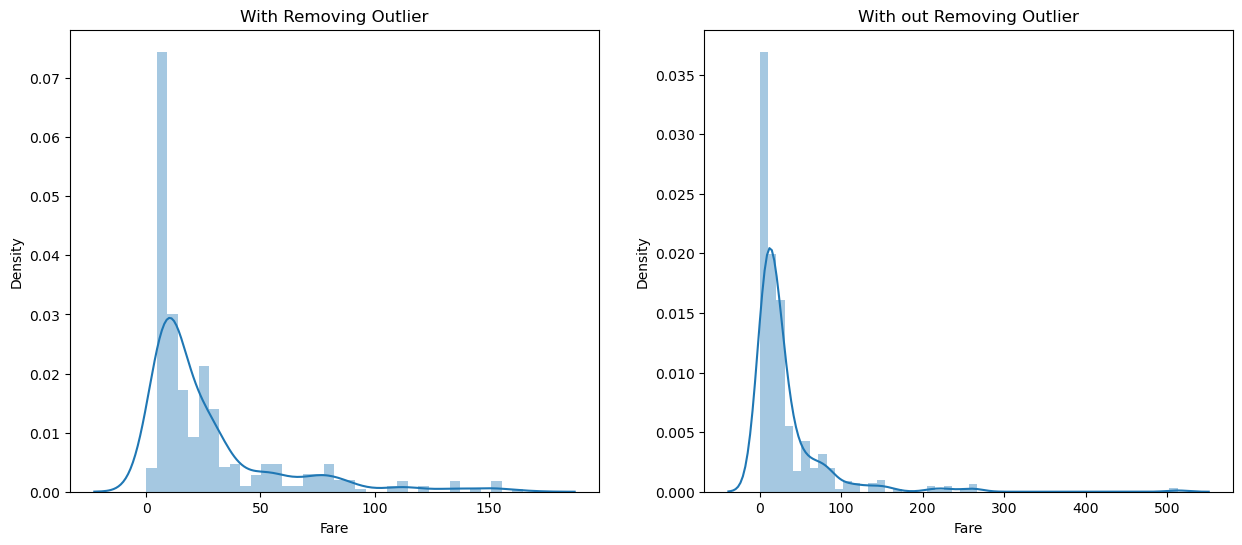

In [220]:
## After Removing Outliers


plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
snc.distplot(new_train['Fare'])
plt.title('With Removing Outlier')


plt.subplot(1,2,2)
snc.distplot(train['Fare'])
plt.title('With out Removing Outlier')
plt.show()

In [201]:
from scipy import stats

In [202]:
z_score =np.abs(stats.zscore(train.select_dtypes(include=[np.number])))

z_scores_df = pd.DataFrame(z_score, columns=train.select_dtypes(include=[np.number]).columns)
z_score

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0.789272,0.827377,0.565736,0.432793,0.473674,0.502445
2,1.266990,1.566107,0.663861,0.432793,0.473674,0.786845
3,1.266990,0.827377,0.258337,0.474545,0.473674,0.488854
4,1.266990,1.566107,0.433312,0.432793,0.473674,0.420730
5,0.789272,0.827377,0.433312,0.474545,0.473674,0.486337
...,...,...,...,...,...,...
887,0.789272,0.369365,0.181487,0.474545,0.473674,0.386671
888,1.266990,1.566107,0.796286,0.474545,0.473674,0.044381
889,0.789272,0.827377,0.104637,0.432793,2.008933,0.176263


<Axes: xlabel='Age', ylabel='Density'>

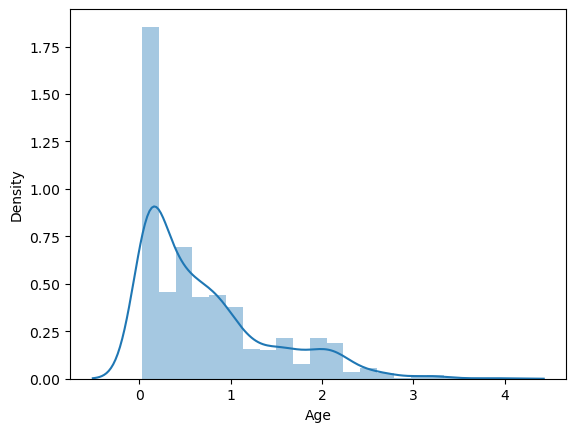

In [203]:
snc.distplot(z_score['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

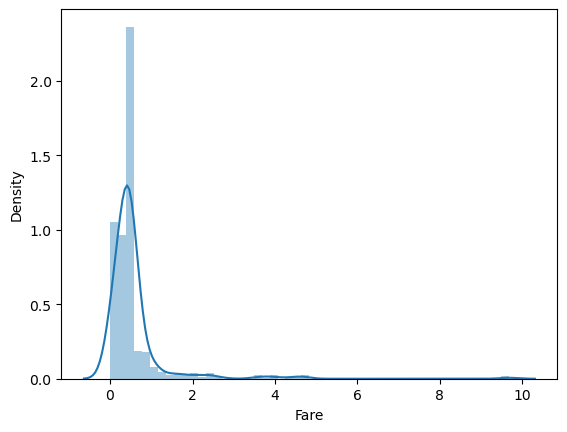

In [204]:
snc.distplot(z_score['Fare'])

In [205]:
# Combine original data with Z-scores and IQR
combined_data = train.copy()
combined_data = pd.concat([combined_data, z_scores_df.add_suffix('_zscore')], axis=1)

# Add IQR as a row (since IQR is a single value per column)
#combined_data.loc['IQR'] = pd.concat([train, IQR.rename(index=lambda x: x + '_IQR')])

# Add IQR as a row (since IQR is a single value per column)
IQR_dict = {f'{col}_IQR': IQR[col] for col in IQR.index}
combined_data = combined_data.append(IQR_dict, ignore_index=True)

print(combined_data.head())


AttributeError: 'numpy.float64' object has no attribute 'index'

In [223]:
train.select_dtypes(include=np.number)

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,28.0,1,2,23.4500
